In [ ]:
from google.colab import drive 
drive.mount('/content/drive/MyDrive')

In [4]:
import os.path
from os import makedirs
import cv2
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

#작업 폴더
if not os.path.exists('/content/drive/MyDrive/Fundus'):
  os.makedirs('/content/drive/MyDrive/Fundus')
#만들어진 데이터셋 저장할 폴더
if not os.path.exists('/content/drive/MyDrive/Fundus/dataset'):
  os.makedirs('/content/drive/MyDrive/Fundus/dataset')

In [5]:
save_dir='/content/drive/MyDrive/Fundus/dataset'

#바꿔야됨!
path = '/content/drive/MyDrive/사진 저장된 폴더'
#사용될 폴더, 바꿀 필요 없음
folder_name = ['GoodPairSideCut','Planets','Shuffled','Shuffled_Mask']

In [8]:
def make_dataset(path_dir,save_dir,foldername):
    train = []
    label = []
    for i in foldername:
        filelist = os.listdir(path_dir+'/'+i)
        for j in filelist:
            if 'jpg' in j:
                temporary_label = 1 if i == 'GoodPairSideCut' else 0
                img = cv2.imread(path_dir+'/'+i+'/'+j)
                fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                fix_img = cv2.resize(fix_img,dsize=(100,100),interpolation=cv2.INTER_AREA)
                train.append(np.array(fix_img)/255)
                label.append(temporary_label)
            else:
                pass
    X_train, X_test, y_train, y_test = train_test_split(train,label
                                                        ,test_size=0.2,
                                                        random_state=42)
    with open(save_dir+'/x_train.pkl','wb') as f:
        pickle.dump(X_train,f)
    with open(save_dir+'/x_test.pkl','wb') as f:
        pickle.dump(X_test,f)
    with open(save_dir+'/y_train.pkl','wb') as f:
        pickle.dump(y_train,f)
    with open(save_dir+'/y_test.pkl','wb') as f:
        pickle.dump(y_test,f)
        
    return X_train, X_test, y_train, y_test

In [9]:
import cv2
import numpy as np
X_train, X_test, y_train, y_test = make_dataset(path,save_dir,folder_name)

In [10]:
path = save_dir+'/x_test.pkl'
label_path = save_dir+'/y_test.pkl'
with open(path,'rb') as f:
    a1 = pickle.load(f)
    
with open(label_path,'rb') as f:
    a2 = pickle.load(f)

In [15]:
print(np.array(a1).shape)
print(np.array(a2).shape)

(1648, 100, 100, 3)
(1648,)


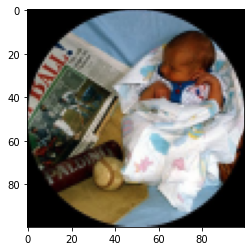

0


In [19]:
plt.imshow(a1[1])
plt.show()
print(a2[1])